## 1.1 Data Acquisition

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("student_data.csv")

df.head()

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


## 1.2 Data Exploration

- Study each attribute and its characteristics (Name, Type, etc)
- Visualize data (Distribusion, Correlation Heatmap)
- Draw insights from each step and identify necessary stesp in the Data Preparation phase
- Identify the target attribute(s)

In [2]:
df_EDA = df.copy()

df_EDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                630000 non-null  int64  
 1   age               630000 non-null  int64  
 2   gender            630000 non-null  object 
 3   course            630000 non-null  object 
 4   study_hours       630000 non-null  float64
 5   class_attendance  630000 non-null  float64
 6   internet_access   630000 non-null  object 
 7   sleep_hours       630000 non-null  float64
 8   sleep_quality     630000 non-null  object 
 9   study_method      630000 non-null  object 
 10  facility_rating   630000 non-null  object 
 11  exam_difficulty   630000 non-null  object 
 12  exam_score        630000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ MB


In [3]:
df_EDA.describe()

,id,age,study_hours,class_attendance,sleep_hours,exam_score
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,314999.500000,20.545821,4.002337,71.987261,7.072758,62.506672
std,181865.479132,2.260238,2.359880,17.430098,1.744811,18.916884
min,0.000000,17.000000,0.080000,40.600000,4.100000,19.599000
25%,157499.750000,19.000000,1.970000,57.000000,5.600000,48.800000
50%,314999.500000,21.000000,4.000000,72.600000,7.100000,62.600000
75%,472499.250000,23.000000,6.050000,87.200000,8.600000,76.300000
max,629999.000000,24.000000,7.910000,99.400000,9.900000,100.000000


> **Insights**
> - There are no missing values and the dataset looks complete.
> - Some categorical values can be converted into dummy variables, and one-hot encoding seems to be necessary.

In [4]:
df_EDA = df_EDA.drop(['id'], axis=1)
df_EDA['age'] = df_EDA['age'].astype(float)
df_EDA.head()

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,21.0,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,18.0,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,20.0,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,19.0,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,23.0,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


In [5]:
df_EDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   age               630000 non-null  float64
 1   gender            630000 non-null  object 
 2   course            630000 non-null  object 
 3   study_hours       630000 non-null  float64
 4   class_attendance  630000 non-null  float64
 5   internet_access   630000 non-null  object 
 6   sleep_hours       630000 non-null  float64
 7   sleep_quality     630000 non-null  object 
 8   study_method      630000 non-null  object 
 9   facility_rating   630000 non-null  object 
 10  exam_difficulty   630000 non-null  object 
 11  exam_score        630000 non-null  float64
dtypes: float64(5), object(7)
memory usage: 57.7+ MB


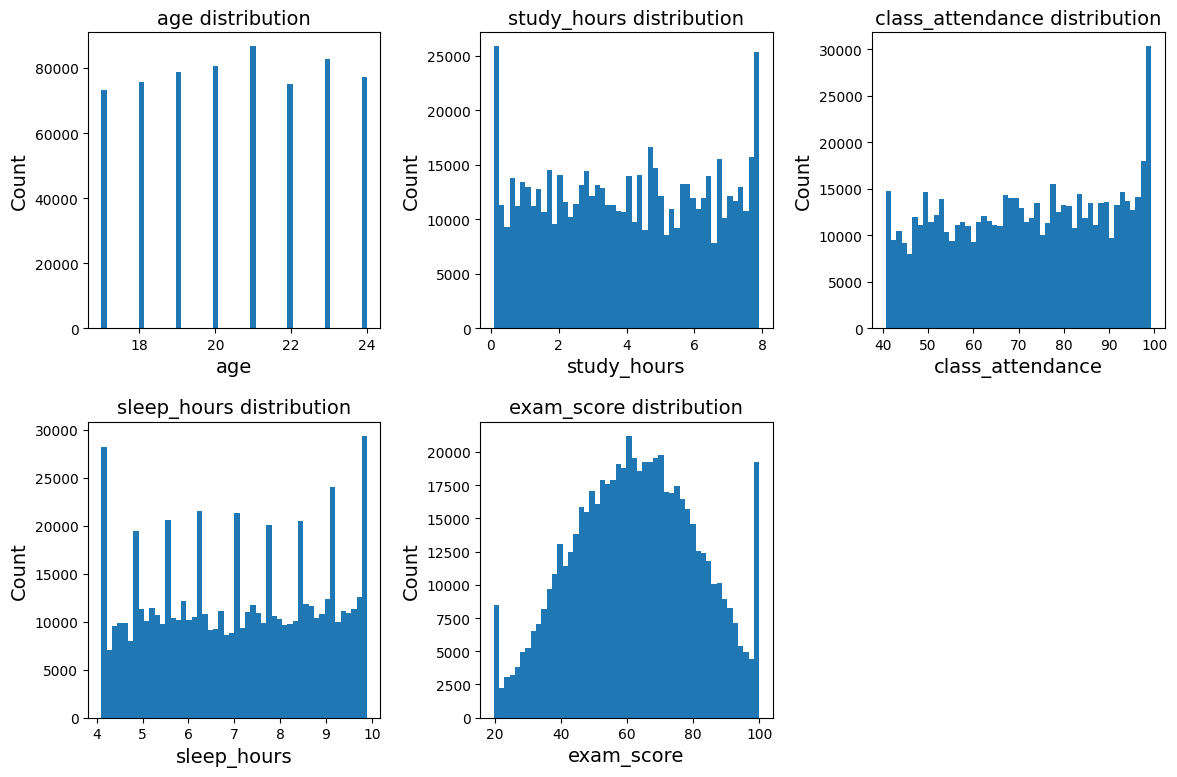

In [6]:
# Data distribution (Numerical variables)

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

numeric_cols = df_EDA.select_dtypes(include=['float64']).columns

# Display 3 graphs per line for visual clarity
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    axes[i].hist(df_EDA[col], bins=50) 
    axes[i].set_title(f"{col} distribution")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

>**Insights**
>- If a feature distribution is highly skewed or contains significant outliers, feature transformation may be required to stabilize model training.
>- Based on the current data distribution, however, no additional feature transformation appears to be necessary.

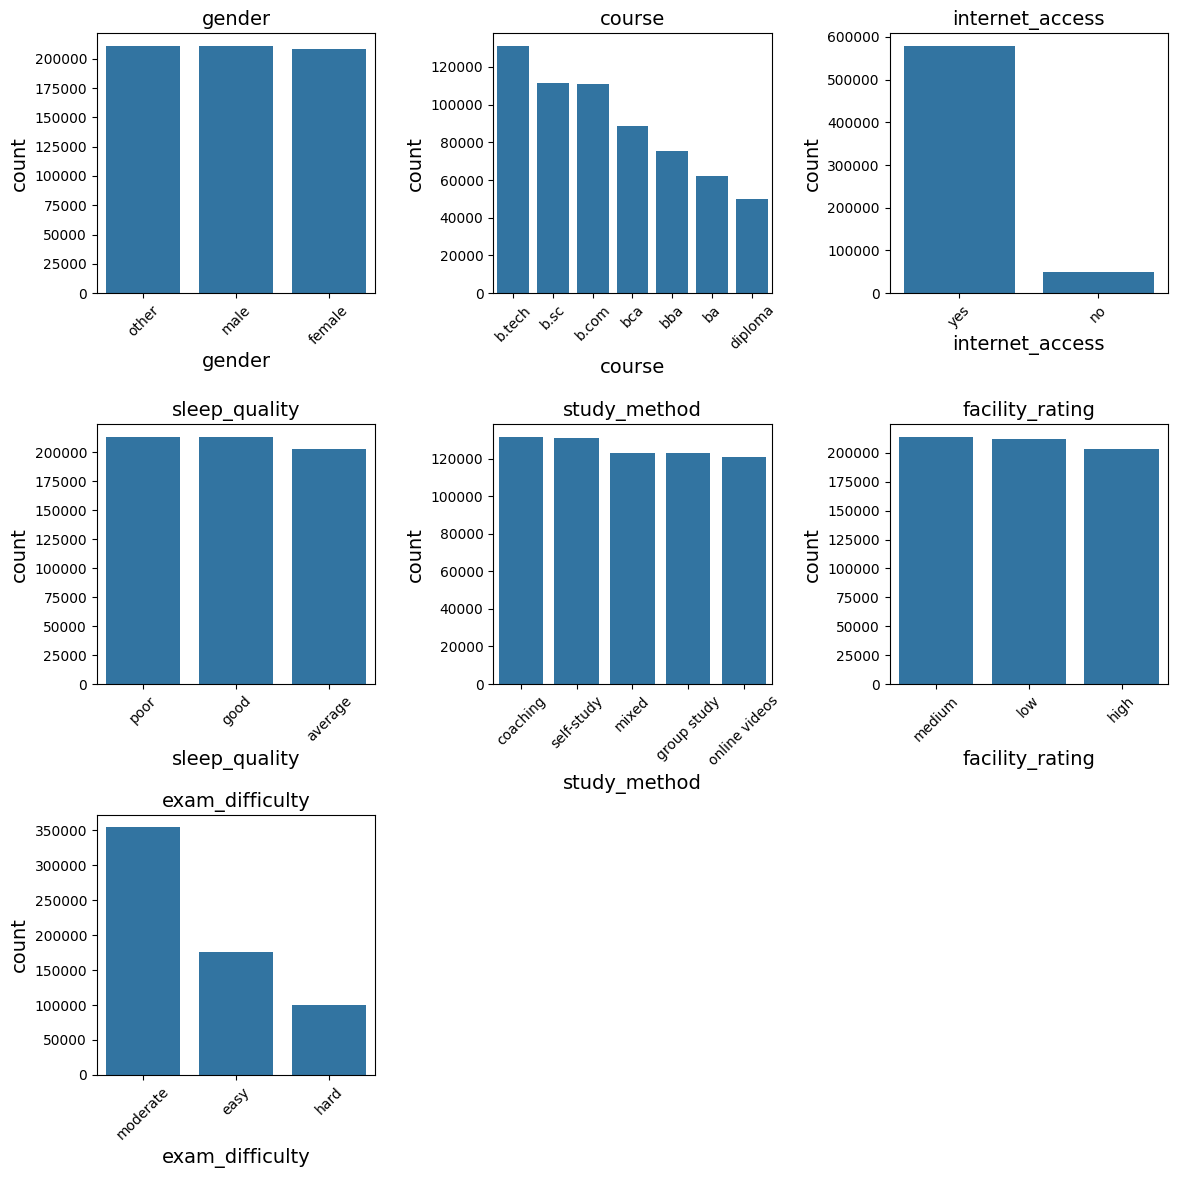

In [7]:
# Data distribution (Categorical variables)

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

categorical_cols = df_EDA.select_dtypes(include=['object']).columns

# Display 3 graphs per line for visual clarity
n_cols = 3  
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df_EDA, x=col, order=df_EDA[col].value_counts().index, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

> **Insights**
> - There are "Other" value in "Gender" feature, which needs to be examined
> - "Facility rating" feature is not intuitive and could be removed

In [8]:
df_EDA['gender'].value_counts()

gender
other     211097
male      210593
female    208310
Name: count, dtype: int64

> **Insights**
> - There are ambiguous value ("other"), but the count is too high to simply drop
> - To consider not using the gender feature in ML, correlation check between test scores and gender is needed

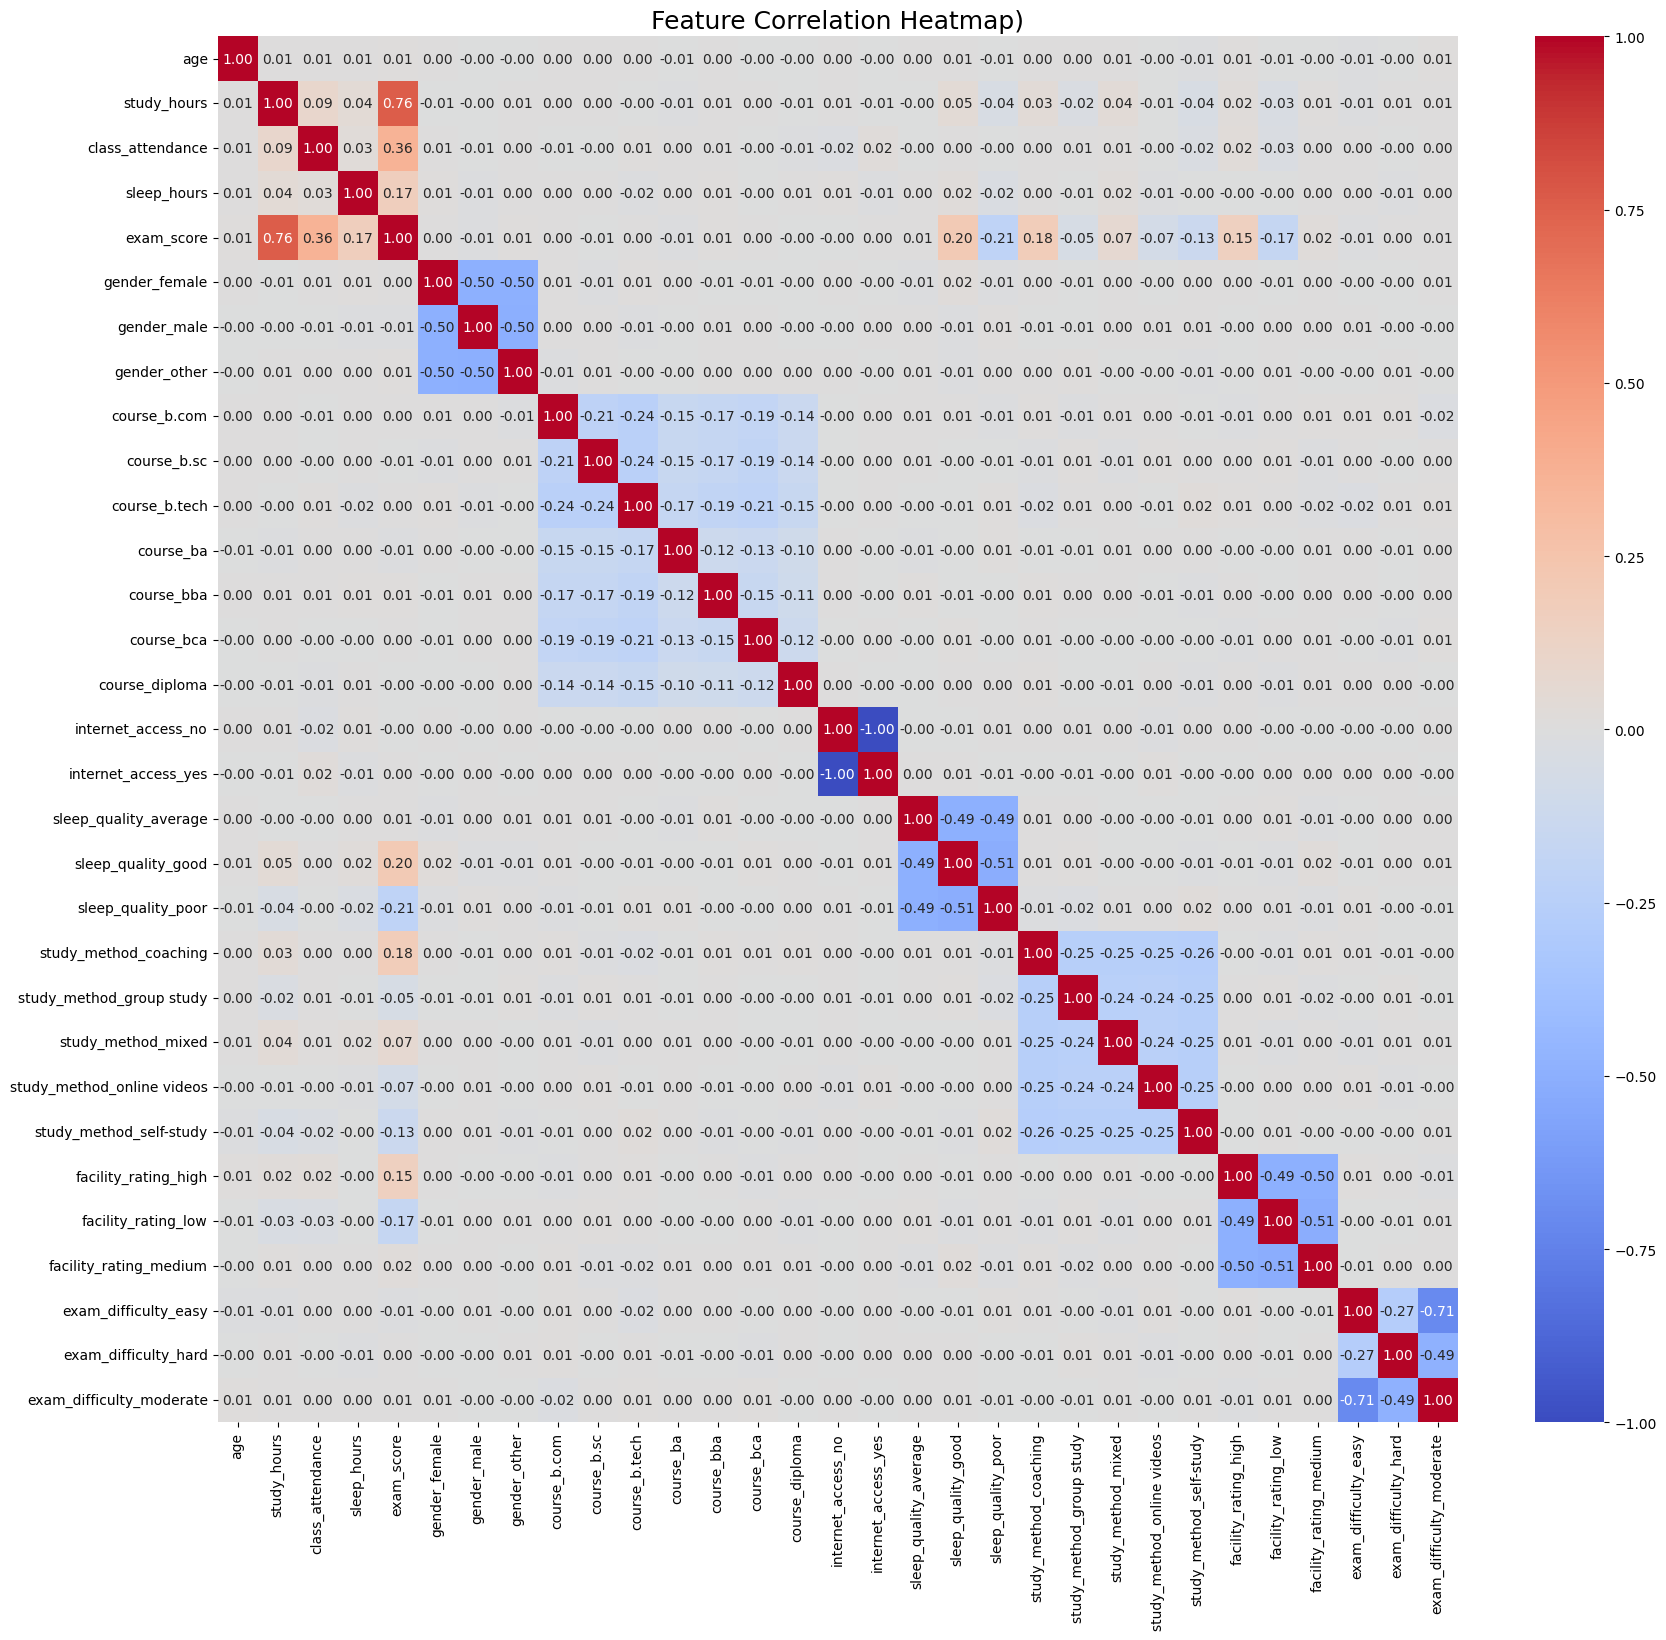

In [9]:
# Correlation Heatmap

df_encoded = pd.get_dummies(df_EDA, columns=categorical_cols, drop_first=False) # one-hot encodding for cat variables

corr_matrix = df_encoded.corr()

plt.figure(figsize=(20, 18))
sns.heatmap(
    corr_matrix,
    annot=True,         
    fmt=".2f",          
    cmap="coolwarm",
    cbar=True,
    annot_kws={"size": 10}  
)
plt.title("Feature Correlation Heatmap)", fontsize=18)
plt.show()


> **Insights**
> - Given the heatmap, the correlation check between test scores and gender is not high enough
> - Therefore, I can consider excluding "gender" feature in the ML process

In [10]:
num_cols = ['age', 'study_hours', 'class_attendance', 'sleep_hours'] # "exam_score" excluded as it's a target variable

# Statistical charateristic
print(df_EDA[num_cols].describe())
print()

# IQR-based outlier check
for col in num_cols:
    Q1 = df_EDA[col].quantile(0.25)
    Q3 = df_EDA[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_EDA[(df_EDA[col] < lower_bound) | (df_EDA[col] > upper_bound)]
    print(f"{col} outliers: {outliers.shape[0]}")

                 age    study_hours  class_attendance    sleep_hours
count  630000.000000  630000.000000     630000.000000  630000.000000
mean       20.545821       4.002337         71.987261       7.072758
std         2.260238       2.359880         17.430098       1.744811
min        17.000000       0.080000         40.600000       4.100000
25%        19.000000       1.970000         57.000000       5.600000
50%        21.000000       4.000000         72.600000       7.100000
75%        23.000000       6.050000         87.200000       8.600000
max        24.000000       7.910000         99.400000       9.900000

age outliers: 0
study_hours outliers: 0
class_attendance outliers: 0
sleep_hours outliers: 0


>**Insights**
>- The dataset is well curated, with no observable outliers and a clean overall structure

## 1.3 Data Preparation (Feature Engineering Pipeline)

### 1.3.1 Encoding

In [11]:
categorical_cols = ['gender', 'course', 'internet_access', 'sleep_quality', 
                    'study_method', 'facility_rating', 'exam_difficulty']

for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

gender: ['female' 'other' 'male']
course: ['b.sc' 'diploma' 'bca' 'b.com' 'ba' 'bba' 'b.tech']
internet_access: ['no' 'yes']
sleep_quality: ['average' 'poor' 'good']
study_method: ['online videos' 'self-study' 'coaching' 'group study' 'mixed']
facility_rating: ['low' 'medium' 'high']
exam_difficulty: ['easy' 'moderate' 'hard']


> **Insights**
>- Some features are nominal categorical variables with no order (e.g., gender, course, internet_access, study_method) **→ One-Hot Encoding**
>- Other features are ordinal categorical variables with a ranking (e.g., sleep_quality, facility_rating, exam_difficulty) **→ OrdinalEncoder**
>- Given this mix of categorical feature types, a hybrid encoding strategy is the most appropriate

In [12]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Cat cols without order
onehot_cols = ['course', 'internet_access', 'study_method']
# As checked earlier, "gender" has unclear value ("other"), so drop the feature

# Cat cols with order
ordinal_cols = ['sleep_quality', 'exam_difficulty']
# The meaning of the “facility_rating” feature is not clearly defined, making its interpretation ambiguous

preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(sparse_output=False), onehot_cols),
    ('ordinal', OrdinalEncoder(categories=[
        ['poor','average','good'],          # sleep_quality
        ['easy','moderate','hard']          # exam_difficulty
    ]), ordinal_cols)
])

### 1.3.2 Feature Scaling

In [13]:
num_cols = ['age', 'study_hours', 'class_attendance', 'sleep_hours'] # 'exam_score' is excluded as it's a target variable

df[num_cols].describe()

,age,study_hours,class_attendance,sleep_hours
count,630000.000000,630000.000000,630000.000000,630000.000000
mean,20.545821,4.002337,71.987261,7.072758
std,2.260238,2.359880,17.430098,1.744811
min,17.000000,0.080000,40.600000,4.100000
25%,19.000000,1.970000,57.000000,5.600000
50%,21.000000,4.000000,72.600000,7.100000
75%,23.000000,6.050000,87.200000,8.600000
max,24.000000,7.910000,99.400000,9.900000


>**Insights**
>- During the initial data exploration, no outliers were identified based on the IQR method
>- However, since the feature ranges vary across variables, scaling is required
>- Given the absence of extreme values, MinMaxScaler is an appropriate choice

In [14]:
from sklearn.preprocessing import MinMaxScaler

num_pipeline = Pipeline([
    ('minmax_scaler', MinMaxScaler(feature_range=(-1, 1)))
])

num_preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols)
])

## 2.1 Train/Test Set Split

In [15]:
df = df.drop(['id', 'gender', 'facility_rating'], axis = 1)  # "id", "gender", “facility_rating” features are not necessary

df.head()

,age,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,exam_difficulty,exam_score
0,21,b.sc,7.91,98.8,no,4.9,average,online videos,easy,78.3
1,18,diploma,4.95,94.8,yes,4.7,poor,self-study,moderate,46.7
2,20,b.sc,4.68,92.6,yes,5.8,poor,coaching,moderate,99.0
3,19,b.sc,2.00,49.5,yes,8.3,average,group study,moderate,63.9
4,23,bca,7.65,86.9,yes,9.6,good,self-study,easy,100.0


In [16]:
from sklearn.model_selection import train_test_split

categorical_cols = ['course', 'internet_access', 'sleep_quality', 'study_method', 'exam_difficulty']
numerical_cols = ['age', 'study_hours', 'class_attendance', 'sleep_hours', 'exam_score']

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
print(len(train_df))
print(len(test_df))

504000
126000


In [17]:
# Check the distribution differences of Categofical variables after a split

print("=== CATEGORICAL VARIABLES ===\n")
for col in categorical_cols:
    print(f"Column: {col}")
    print("Original distribution:")
    print(df[col].value_counts(normalize=True))
    print("Train distribution:")
    print(train_df[col].value_counts(normalize=True))
    print("Test distribution:")
    print(test_df[col].value_counts(normalize=True))
    print("-"*50)

=== CATEGORICAL VARIABLES ===

Column: course
Original distribution:
course
b.tech     0.208311
b.sc       0.177070
b.com      0.176083
bca        0.140827
bba        0.120070
ba         0.098395
diploma    0.079244
Name: proportion, dtype: float64
Train distribution:
course
b.tech     0.208331
b.sc       0.177083
b.com      0.176036
bca        0.140813
bba        0.120105
ba         0.098575
diploma    0.079056
Name: proportion, dtype: float64
Test distribution:
course
b.tech     0.208230
b.sc       0.177016
b.com      0.176270
bca        0.140881
bba        0.119929
ba         0.097675
diploma    0.080000
Name: proportion, dtype: float64
--------------------------------------------------
Column: internet_access
Original distribution:
internet_access
yes    0.919719
no     0.080281
Name: proportion, dtype: float64
Train distribution:
internet_access
yes    0.919819
no     0.080181
Name: proportion, dtype: float64
Test distribution:
internet_access
yes    0.919317
no     0.080683
Name:

In [18]:
# Check Mean & STD of Numerical variables after a split

print("\n=== NUMERICAL VARIABLES ===\n")
for col in numerical_cols:
    print(f"Column: {col}")
    print(f"Original mean/std: {df[col].mean():.2f}/{df[col].std():.2f}")
    print(f"Train mean/std: {train_df[col].mean():.2f}/{train_df[col].std():.2f}")
    print(f"Test mean/std: {test_df[col].mean():.2f}/{test_df[col].std():.2f}")
    print("-"*50)


=== NUMERICAL VARIABLES ===

Column: age
Original mean/std: 20.55/2.26
Train mean/std: 20.54/2.26
Test mean/std: 20.56/2.26
--------------------------------------------------
Column: study_hours
Original mean/std: 4.00/2.36
Train mean/std: 4.00/2.36
Test mean/std: 4.02/2.36
--------------------------------------------------
Column: class_attendance
Original mean/std: 71.99/17.43
Train mean/std: 71.98/17.43
Test mean/std: 72.00/17.41
--------------------------------------------------
Column: sleep_hours
Original mean/std: 7.07/1.74
Train mean/std: 7.07/1.74
Test mean/std: 7.07/1.75
--------------------------------------------------
Column: exam_score
Original mean/std: 62.51/18.92
Train mean/std: 62.48/18.93
Test mean/std: 62.60/18.86
--------------------------------------------------


> **Insights**
> - The data has been sufficiently well sampled

## 2.2 Modelling

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Combine the two preprocessing pipelines
full_preprocessor = ColumnTransformer([
    ('cat', preprocessor, onehot_cols + ordinal_cols),  
    ('num', num_preprocessor, num_cols)                 
])

# Linear Regression Pipelien
lr_pipeline = Pipeline([
    ('preprocessor', full_preprocessor),
    ('regressor', LinearRegression())
])

# Random Forest Pipeline
rf_pipeline = Pipeline([
    ('preprocessor', full_preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# XGBoost Pipeline
xgb_pipeline = Pipeline([
    ('preprocessor', full_preprocessor),
    ('regressor', XGBRegressor(n_estimators=100, random_state=42))
])

## 2.3 Training and Evaluating on the Training Set

### 2.3.1 Evaluation with RMSE & R$^2$

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

# Train and evaluate
def evaluate_on_train(pipeline, X_train, y_train):
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_train)
    mse = mean_squared_error(y_train, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_train, y_pred)
    return rmse, r2

X_train = train_df.drop(columns='exam_score')
y_train = train_df['exam_score']

# Linear Regression
lr_rmse, lr_r2 = evaluate_on_train(lr_pipeline, X_train, y_train)

# Random Forest
rf_rmse, rf_r2 = evaluate_on_train(rf_pipeline, X_train, y_train)

# XGBoost
xgb_rmse, xgb_r2 = evaluate_on_train(xgb_pipeline, X_train, y_train)


print(f"Linear Regression → RMSE: {lr_rmse:.2f}, R2: {lr_r2:.3f}")
print(f"Random Forest    → RMSE: {rf_rmse:.2f}, R2: {rf_r2:.3f}")
print(f"XGBoost          → RMSE: {xgb_rmse:.2f}, R2: {xgb_r2:.3f}")

Linear Regression → RMSE: 9.37, R2: 0.755
Random Forest    → RMSE: 3.58, R2: 0.964
XGBoost          → RMSE: 9.12, R2: 0.768


### 2.3.2 Better Evaluation Using Cross-Validation

In [21]:
from sklearn.model_selection import cross_val_score

# Linear Regression CV
lr_rmses = -cross_val_score(lr_pipeline, X_train, y_train,
                            scoring="neg_root_mean_squared_error", cv=10)
print("Linear Regression CV RMSE")
print(pd.Series(lr_rmses).describe())

# Random Forest CV
rf_rmses = -cross_val_score(rf_pipeline, X_train, y_train,
                            scoring="neg_root_mean_squared_error", cv=10)
print("\nRandom Forest CV RMSE")
print(pd.Series(rf_rmses).describe())

# XGBoost CV
xgb_rmses = -cross_val_score(xgb_pipeline, X_train, y_train,
                             scoring="neg_root_mean_squared_error", cv=10)
print("\nXGBoost CV RMSE")
print(pd.Series(xgb_rmses).describe())

Linear Regression CV RMSE
count    10.000000
mean      9.374979
std       0.023247
min       9.332415
25%       9.369949
50%       9.376170
75%       9.389313
max       9.403660
dtype: float64

Random Forest CV RMSE
count    10.000000
mean      9.568707
std       0.028501
min       9.531170
25%       9.555742
50%       9.565473
75%       9.575618
max       9.625835
dtype: float64

XGBoost CV RMSE
count    10.000000
mean      9.271138
std       0.027667
min       9.222674
25%       9.257492
50%       9.281790
75%       9.287208
max       9.305481
dtype: float64


## 2.4 Model Selection

**Final Choice:  XGBoost**

While Random Forest showed an impressive Train RMSE of 3.58, its performance plummeted to 9.56 on CV. In contrast, XGBoost achieved the lowest CV RMSE (9.27) among all models, proving it is the most reliable for real-world predictions. Along with some tuning techniques, XGBoost can outperformed Linear Regression.

## 2.5 Fine-Tune the Model

### 2.5.1 Randomized Search (Try with sample data for time efficiency)

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# 10% data sampling
X_train_sample = X_train.sample(n=50000, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]


param_dist = {
    'regressor__n_estimators': randint(500, 1000),
    'regressor__learning_rate': uniform(0.01, 0.1),
    'regressor__max_depth': [3, 4, 5, 6],
    'regressor__subsample': uniform(0.7, 0.3),
    'regressor__colsample_bytree': uniform(0.7, 0.3),
}


rnd_search = RandomizedSearchCV(
    xgb_pipeline, 
    param_distributions=param_dist, 
    n_iter=10,           
    cv=3,                
    scoring='neg_root_mean_squared_error', 
    verbose=2,           
    n_jobs=-1, 
    random_state=42
)


print("Starting tuning on 10% sampled data...")
rnd_search.fit(X_train_sample, y_train_sample)

print(f"\nBest Parameters: {rnd_search.best_params_}")
print(f"Sample CV RMSE: {-rnd_search.best_score_:.2f}")

Starting tuning on 10% sampled data...
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best Parameters: {'regressor__colsample_bytree': 0.8777243706586126, 'regressor__learning_rate': 0.014645041271999773, 'regressor__max_depth': 5, 'regressor__n_estimators': 634, 'regressor__subsample': 0.7511572371061874}
Sample CV RMSE: 9.33


### 2.5.2 Final Training on Full Dataset

In [23]:
# Get the best parameters
best_params = rnd_search.best_params_

final_xgb_model = xgb_pipeline.set_params(**best_params)

# Train on the full dataset
final_xgb_model.fit(X_train, y_train) 


train_pred = final_xgb_model.predict(X_train)
full_train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
full_train_r2 = r2_score(y_train, train_pred)

print(f"--- Full Training Set Performance ---")
print(f"Full Train RMSE: {full_train_rmse:.2f}")
print(f"Full Train R2 Score: {full_train_r2:.4f}")

--- Full Training Set Performance ---
Full Train RMSE: 9.26
Full Train R2 Score: 0.7609


### 2.5.3 Feature Importance Check

/var/folders/tt/8t254_fd43l2np52syz3hzg00000gn/T/ipykernel_6531/2485240410.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df.head(15), palette='magma')


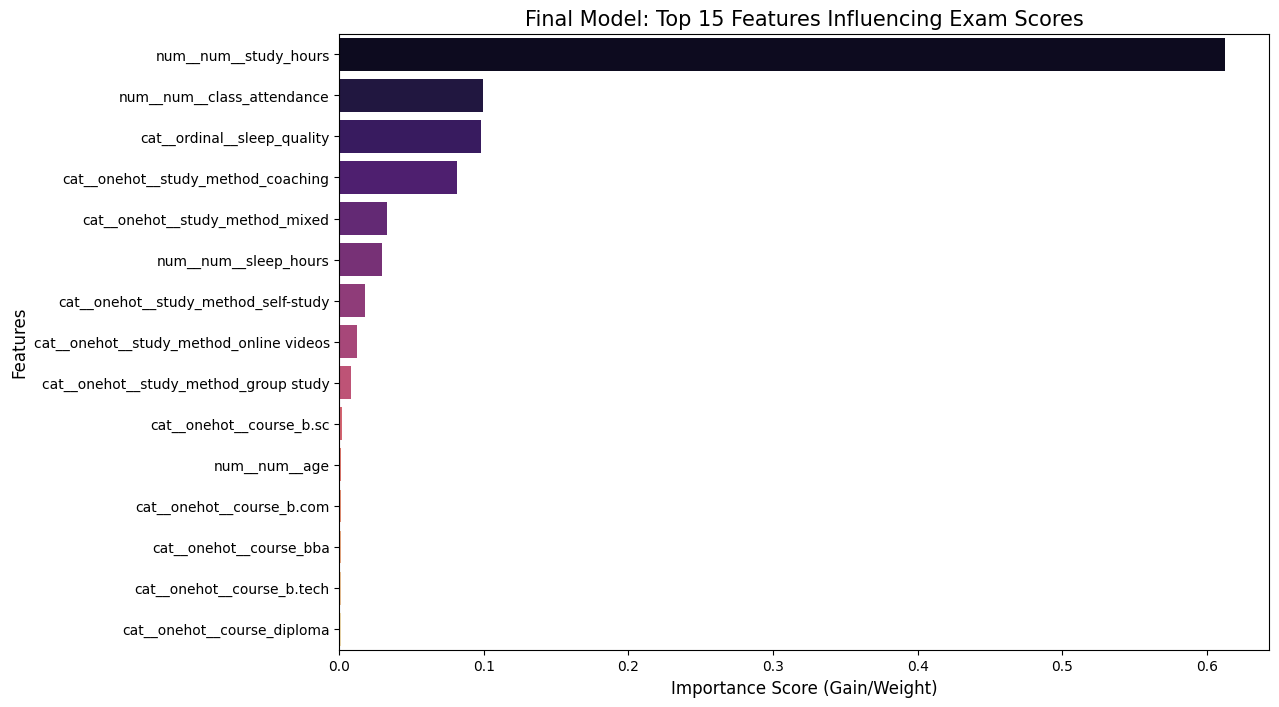

In [24]:
# Extract feature names from the preprocessor
feature_names = final_xgb_model.named_steps['preprocessor'].get_feature_names_out()

# Extract importance scores from the XGBoost regressor
importances = final_xgb_model.named_steps['regressor'].feature_importances_


feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df.head(15), palette='magma')
plt.title('Final Model: Top 15 Features Influencing Exam Scores', fontsize=15)
plt.xlabel('Importance Score (Gain/Weight)', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

## 2.6  Evaluate the Model on the Test Set

### 2.6.1 Model Evaluation

In [25]:
from sklearn.metrics import mean_absolute_error

X_test = test_df.drop(columns='exam_score')
y_test = test_df['exam_score']

final_test_predictions = final_xgb_model.predict(X_test)


final_rmse = np.sqrt(mean_squared_error(y_test, final_test_predictions))
final_mae = mean_absolute_error(y_test, final_test_predictions)
final_r2 = r2_score(y_test, final_test_predictions)

print(f"--- Final Test Performance (Unseen Data) ---")
print(f"Final RMSE: {final_rmse:.4f}")
print(f"Final MAE : {final_mae:.4f}")
print(f"Final R2   : {final_r2:.4f}")

--- Final Test Performance (Unseen Data) ---
Final RMSE: 9.2728
Final MAE : 7.4222
Final R2   : 0.7582


### 2.6.2 Confidence Interval for the test RMSE

In [26]:
from scipy import stats

def rmse(squared_errors):
    return np.sqrt(np.mean(squared_errors))

confidence = 0.95

squared_errors = (final_test_predictions - y_test) ** 2

boot_result = stats.bootstrap([squared_errors], rmse,
                             confidence_level=confidence, 
                             random_state=42,
                             method='percentile') 

rmse_lower, rmse_upper = boot_result.confidence_interval

print(f"95% Confidence Interval for RMSE: [{rmse_lower:.4f}, {rmse_upper:.4f}]")

95% Confidence Interval for RMSE: [9.2362, 9.3091]


## 2.7 Model persistence using joblib

In [27]:
import joblib

# Save the model
joblib.dump(final_xgb_model, "final_exam_score_xgb_model.pkl")

# Load the model
loaded_model = joblib.load("final_exam_score_xgb_model.pkl")

# Verify that the loaded model works correctly
sample_pred = loaded_model.predict(X_test.iloc[:5])
print(f"sample prediction: {sample_pred}")

sample prediction: [65.35367  43.877087 57.593292 64.08157  49.854645]
[CV] END regressor__colsample_bytree=0.7468055921327309, regressor__learning_rate=0.025599452033620268, regressor__max_depth=5, regressor__n_estimators=958, regressor__subsample=0.9598528437324805; total time=   5.4s
[CV] END regressor__colsample_bytree=0.8835558684167137, regressor__learning_rate=0.023949386065204185, regressor__max_depth=6, regressor__n_estimators=687, regressor__subsample=0.8099085529881075; total time=   6.8s
[CV] END regressor__colsample_bytree=0.8368209952651107, regressor__learning_rate=0.08851759613930137, regressor__max_depth=5, regressor__n_estimators=863, regressor__subsample=0.8542703315240834; total time=   5.9s
[CV] END regressor__colsample_bytree=0.7468055921327309, regressor__learning_rate=0.025599452033620268, regressor__max_depth=5, regressor__n_estimators=958, regressor__subsample=0.9598528437324805; total time=   5.3s
[CV] END regressor__colsample_bytree=0.7912726728878613, regre